In [1]:
import tensorflow as tf

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers
from pandas import Series
import math
import numpy
from tensorflow.keras.layers import *
from tensorflow.keras import layers
import pandas as pd

data = pd.read_csv("energydata_complete.csv")

In [2]:
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [4]:
len(data.columns[1:])

28

In [73]:
from sklearn.preprocessing import MinMaxScaler
values = data[data.columns[1:]].values.reshape(-1,28)
values = values.astype('float32')
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(values)
scaled = (values-(np.min(values)))/(np.max(values)-(np.min(values)))

In [100]:
np.min(values)

-6.6

In [74]:
train_size = 16000

train,test = scaled[0:train_size,:],scaled[train_size:,:]
print(len(train),len(test))

16000 3735


In [75]:
def create_dataset_mul(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [76]:
look_back = 24
trainX, trainY = create_dataset_mul(train, look_back)
testX, testY = create_dataset_mul(test, look_back)

15976
3711


In [101]:
trainX.shape

(15976, 24, 28)

In [97]:
first_input = Input(shape=(24,28))


in0=LSTM(64,return_sequences=True)(first_input)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=5, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=5, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

ad=add([in0,in1],name='extractor')
ad=Dropout(0.2)(ad)

#in0=LSTM(64,return_sequences=True)(ad)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=5, activation='relu',padding='same')(ad)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=5, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

ad1=add([in0,in1],name='extractor1')



in1=Flatten()(ad1)
in1=Dropout(0.2)(in1)
#in1=Dense(100, activation='relu')(in1)
out=Dense(1,'relu')(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

model.summary()

checkpoint_path = "saved_weights/energy_onestep.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           [(None, 24, 28)]     0                                            
__________________________________________________________________________________________________
lstm_21 (LSTM)                  (None, 24, 64)       23808       input_22[0][0]                   
__________________________________________________________________________________________________
conv1d_123 (Conv1D)             (None, 24, 64)       20544       lstm_21[0][0]                    
__________________________________________________________________________________________________
conv1d_124 (Conv1D)             (None, 24, 64)       20544       conv1d_123[0][0]                 
___________________________________________________________________________________________

In [98]:
hist = model.fit([trainX],trainY, epochs = 100,validation_data=([testX],testY),batch_size=100, verbose = 1,callbacks=[cb])

Train on 15976 samples, validate on 3711 samples
Epoch 1/100
15900/15976 [============================>.] - ETA: 0s - loss: 0.0087
Epoch 00001: val_loss improved from inf to 0.00396, saving model to saved_weights/energy_onestep.hdf5
15976/15976 [==============================] - 4s 275us/sample - loss: 0.0087 - val_loss: 0.0040
Epoch 2/100
15800/15976 [============================>.] - ETA: 0s - loss: 0.0051
Epoch 00002: val_loss improved from 0.00396 to 0.00325, saving model to saved_weights/energy_onestep.hdf5
15976/15976 [==============================] - 3s 185us/sample - loss: 0.0051 - val_loss: 0.0033
Epoch 3/100
15900/15976 [============================>.] - ETA: 0s - loss: 0.0041
Epoch 00003: val_loss improved from 0.00325 to 0.00277, saving model to saved_weights/energy_onestep.hdf5
15976/15976 [==============================] - 3s 185us/sample - loss: 0.0041 - val_loss: 0.0028
Epoch 4/100
15800/15976 [============================>.] - ETA: 0s - loss: 0.0040
Epoch 00004: val_l

Epoch 40/100
15600/15976 [============================>.] - ETA: 0s - loss: 0.0030
Epoch 00040: val_loss did not improve from 0.00261
15976/15976 [==============================] - 3s 184us/sample - loss: 0.0030 - val_loss: 0.0026
Epoch 41/100
15700/15976 [============================>.] - ETA: 0s - loss: 0.0030
Epoch 00041: val_loss did not improve from 0.00261
15976/15976 [==============================] - 3s 183us/sample - loss: 0.0030 - val_loss: 0.0027
Epoch 42/100
15700/15976 [============================>.] - ETA: 0s - loss: 0.0029
Epoch 00042: val_loss did not improve from 0.00261
15976/15976 [==============================] - 3s 183us/sample - loss: 0.0029 - val_loss: 0.0027
Epoch 43/100
15800/15976 [============================>.] - ETA: 0s - loss: 0.0029
Epoch 00043: val_loss did not improve from 0.00261
15976/15976 [==============================] - 3s 184us/sample - loss: 0.0029 - val_loss: 0.0028
Epoch 44/100
15800/15976 [============================>.] - ETA: 0s - loss: 

Epoch 76/100
15900/15976 [============================>.] - ETA: 0s - loss: 0.0020
Epoch 00076: val_loss did not improve from 0.00261
15976/15976 [==============================] - 4s 246us/sample - loss: 0.0020 - val_loss: 0.0030
Epoch 77/100
15900/15976 [============================>.] - ETA: 0s - loss: 0.0020
Epoch 00077: val_loss did not improve from 0.00261
15976/15976 [==============================] - 4s 246us/sample - loss: 0.0020 - val_loss: 0.0030
Epoch 78/100
15700/15976 [============================>.] - ETA: 0s - loss: 0.0020
Epoch 00078: val_loss did not improve from 0.00261
15976/15976 [==============================] - 4s 246us/sample - loss: 0.0020 - val_loss: 0.0030
Epoch 79/100
15900/15976 [============================>.] - ETA: 0s - loss: 0.0020
Epoch 00079: val_loss did not improve from 0.00261
15976/15976 [==============================] - 4s 246us/sample - loss: 0.0020 - val_loss: 0.0030
Epoch 80/100
15900/15976 [============================>.] - ETA: 0s - loss: 

In [87]:
model.load_weights('saved_weights/energy_onestep.hdf5')

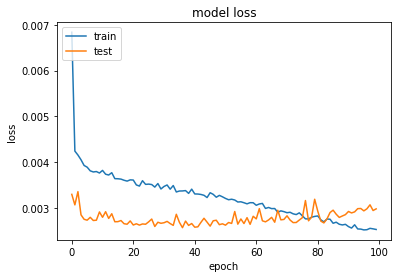

In [85]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

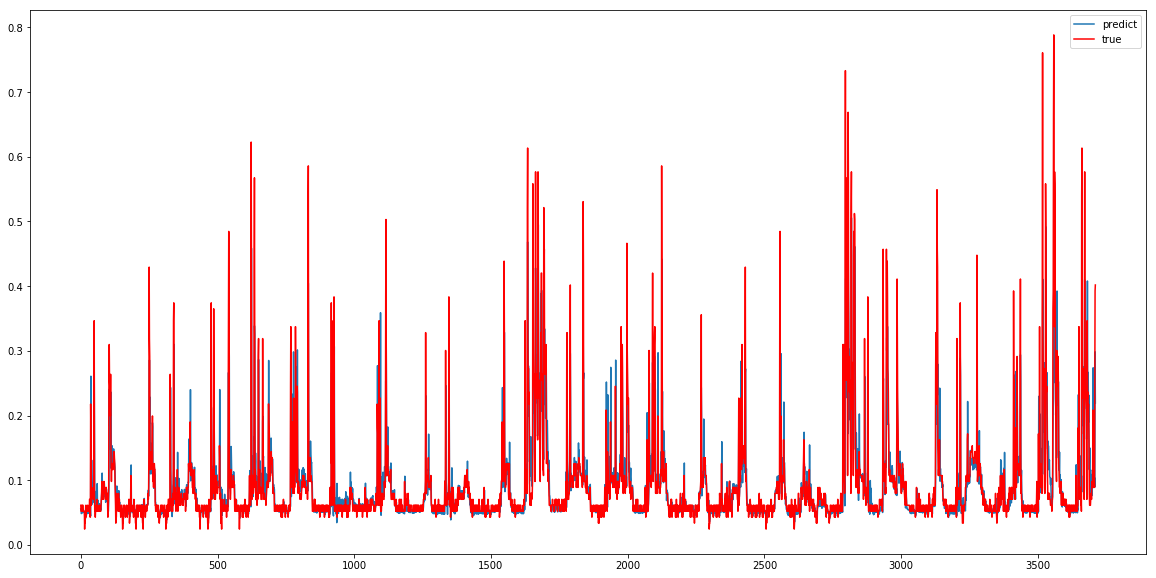

Test RMSE: 0.05072
Test MAE: 0.02267
Test MSE: 0.00257
Test RMSE: 55.11765
Test MAE: 24.63132


In [88]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = model.predict([testX])
yhat=yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(testY,'r', label='true')
pyplot.legend()
pyplot.show()

from math import *
rmse = sqrt(mean_squared_error(testY, yhat))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(testY, yhat)
print('Test MAE: %.5f' % mae)

mse = mean_squared_error(testY, yhat)
print('Test MSE: %.5f' % mse)

yhat_inverse = yhat*(np.max(values)-np.min(values))+np.min(values)
testY_inverse=testY*(np.max(values)-np.min(values))+np.min(values)
rmse = sqrt(mean_squared_error(yhat_inverse, testY_inverse))
mae=mean_absolute_error(yhat_inverse, testY_inverse)
print('Test RMSE: %.5f' % rmse)
print('Test MAE: %.5f' % mae)

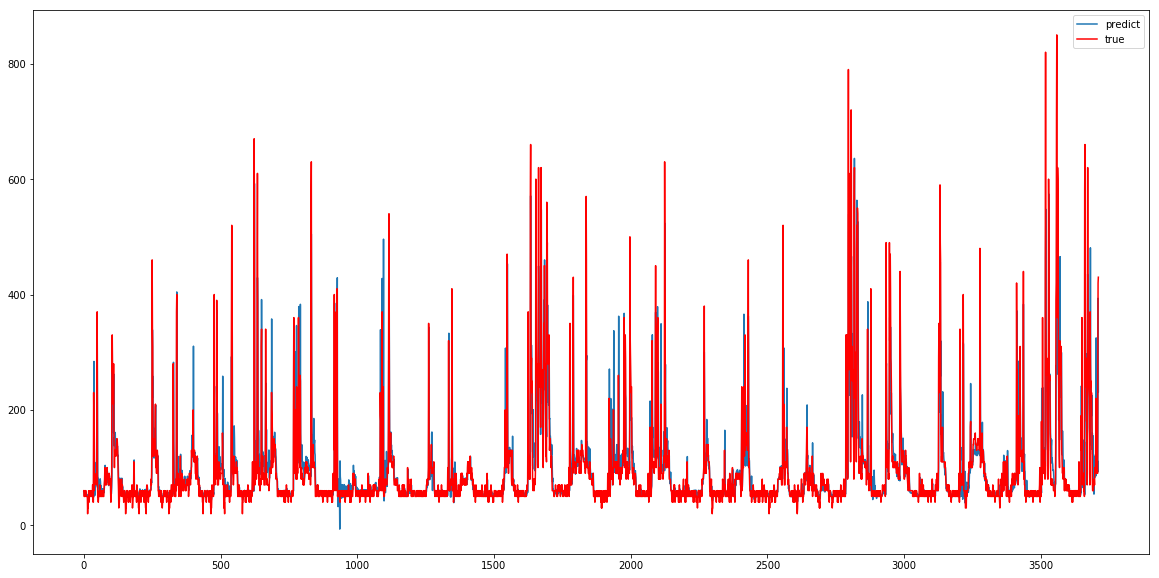

In [47]:
plt.figure(figsize=(20,10))

pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse,'r', label='true')
pyplot.legend()
pyplot.show()

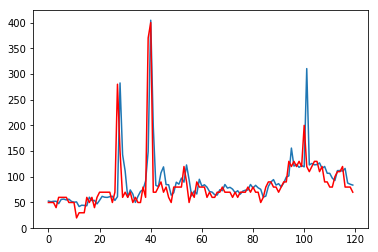

In [50]:
pyplot.plot(yhat_inverse[300:420], label='predict')
pyplot.plot(testY_inverse[300:420],'r', label='true')